In [100]:
#import các thứ viện cần dùng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import các thư viện machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score



## 1. Introdution

## 2. Import Data

In [20]:
#import dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 3. Data Exploration

Sau khi có được dataset, tiếp theo là việc thống kê số lượng hàng, cột trong dataset, bản ghi dữ liệu, các cột dữ liệu và các kiểu dữ liệu của cột tương ứng, các giá trị bị thiếu.

In [11]:
# Check missing value
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

Dataset không có giá trị bị thiếu

In [12]:
# Thông tin của dataset(các cột dữ liệu,kiểu dữ liệu tương ứng)
df.shape

(11162, 17)

Dataset gồm 17 features  và 11162 object(dòng)

In [24]:
# Thông tin các features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
# Các đặc tính của các features
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# Các features đầu vào:
age - Tuổi của KH tính bằng năm(int)
job - TT nghề nghiệp của KH(obj)
marital - Tình trạng hôn nhân( single, maried hoặc divorced)
education - Trình độ học vấn(obj)
default - Có khoản nợ hay không(Yes/No)(obj)
housing - Có nhà hay không(Yes/No)
loan - Khoản vay(Yes/No)
contact - Cách thức liên hệ
day - Ngày
month - tháng
duration - Thời lượng liên hệ cuối cùng
campaign - số lượng địa chỉ liên hệ đã thực hiện và cho khách hàng này trong chiến dịch này
pdays - số ngày đã trôi qua sau khi khách hàng được liên hệ lần cuối từ chiến dịch trước đó
previous - số lượng địa chỉ liên hệ đã thực hiện cho khách hàng này trước chiến dịch này
poutcome - kết quả của chiến dịch tiếp thị trước đó
deposit - Có chấp nhận mở sổ tiết kiệm hay không(Yes,No)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [25]:
#  Thống kê mô tả cơ bản của dataset với trị nhỏ nhất, lớn nhất, trung bình… 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## 4. Data Visualization

Features 'Deposit' chứa thông tin phản hồi của KH về việc có đăng ký gửi tiền hay không, và cột này chứa thông tin sẽ dự đoán. Vì vậy trực quan hóa 'Deposit' với các features khác và so sánh để thấy rõ tương quan qua các biểu đồ.

<AxesSubplot:title={'center':'Deposit value counts'}>

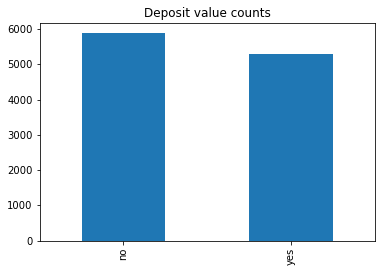

In [30]:
# Đầu tiên là tương quan giữa Yes và No trong cột Deposit:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

Trên biểu đồ, nhận thấy rằng số lượng giá trị "Yes" và "No" cho giá trị "Deposit" là gần nhau, vì vậy có thể sử dụng độ chính xác làm tiêu chuẩn cho một mô hình dự đoán kết quả chiến dịch

#### Giá trị của 'Deposit' bị ảnh hưởng thế nào bởi các features khác?

<AxesSubplot:title={'center':'Job and deposit'}>

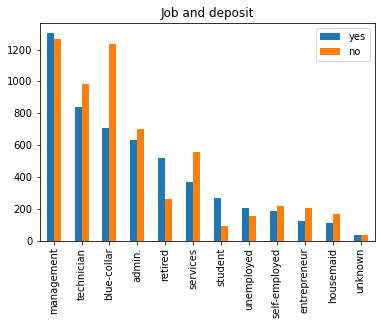

In [29]:
# job và deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

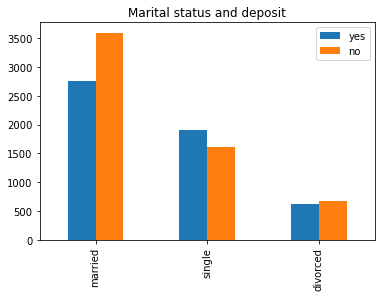

In [31]:
#marital status và deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

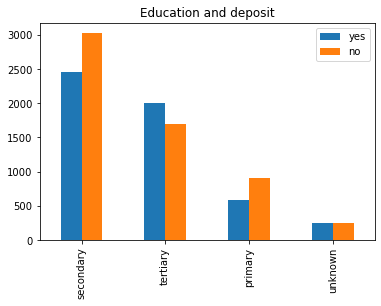

In [33]:
#education và deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

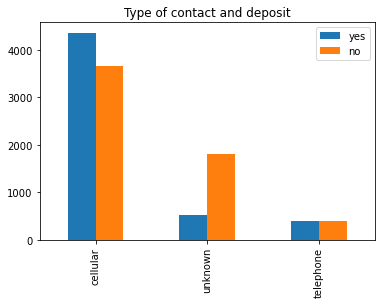

In [34]:
# contact và deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

Nhìn vào các biểu đồ, chúng ta nhận xét được:
1. Những KH có job là 'blue-collar' và 'sevices' ít có khả năng sẽ gửi tiết kiệm hơn hẳn
2. Những KH đã kết hôn có xu hướng ít gửi tiết kiệm hơn
3. Những KH được contact qua 'cellular'(di động) ít có khả năng sẽ gửi tiết kiệm

#### Giá trị của 'Deposit' bị ảnh hưởng thế nào bởi các features chứa các giá trị số?

In [35]:
#balance và deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<AxesSubplot:title={'center':'Thống kê số dư và tiền gửi'}>

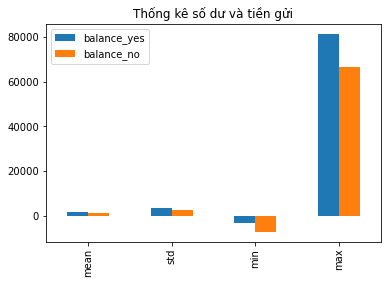

In [37]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Thống kê số dư và tiền gửi')

In [38]:
#age và deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

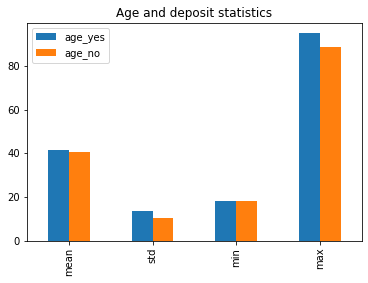

In [39]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [40]:
#số lượng địa chỉ liên hệ được thực hiện trong chiến dịch này ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

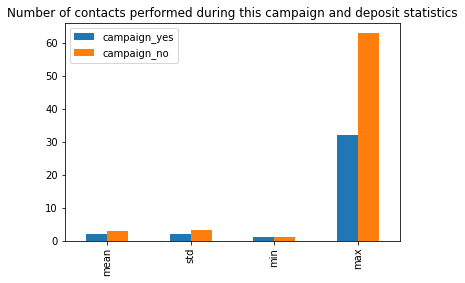

In [41]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [42]:
#số lượng địa chỉ liên hệ được thực hiện trước đó ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

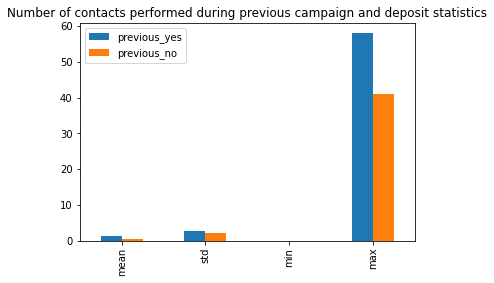

In [43]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

Nhận xét:
1. Những người có xu hướng sẽ gửi tiết kiệm thường là người có nhiều tài sản dư(balace) và độ tuổi lớn(age)
2. Những người đã gửi tiết kiệm sẽ có xu hướng ít tham gia gửi tiếp trong chiến dịch lần này

#### Biểu đồ phân bố Histogram cho biết giải miền  theo các thuộc tính ở bộ dữ liệu

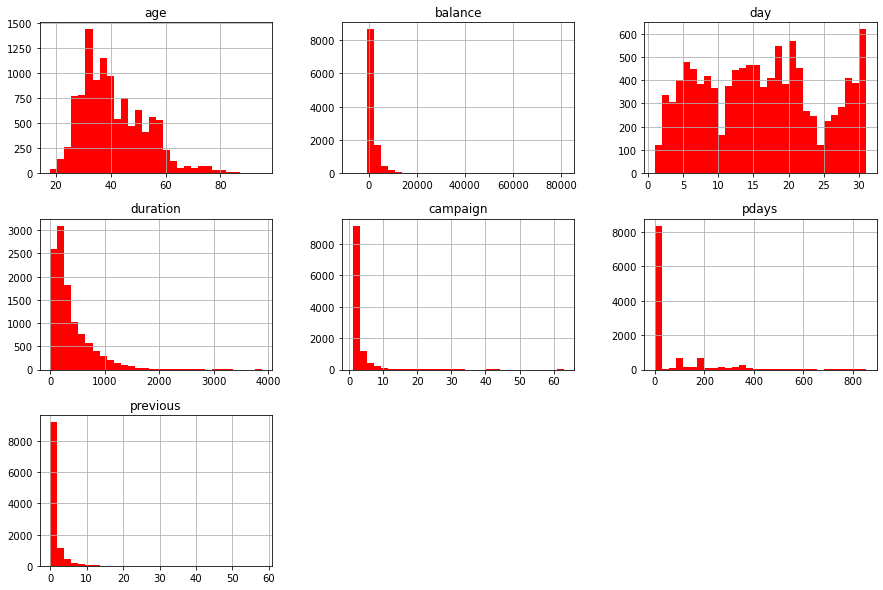

In [45]:
df.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

#### Biểu đồ tìm kiếm phân bổ giải miền theo thuộc tính.
Sử dụng BoxPlot sẽ giúp chúng ta hiểu được đặc điểm chính của phân bố giải miền dựa trên: mean, lower and upper quartile, minimal and maximum, outliers

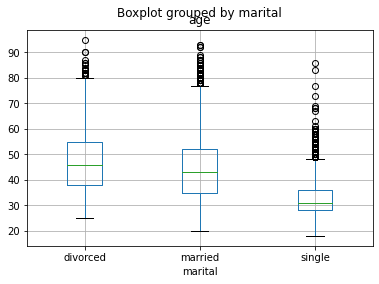

In [46]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

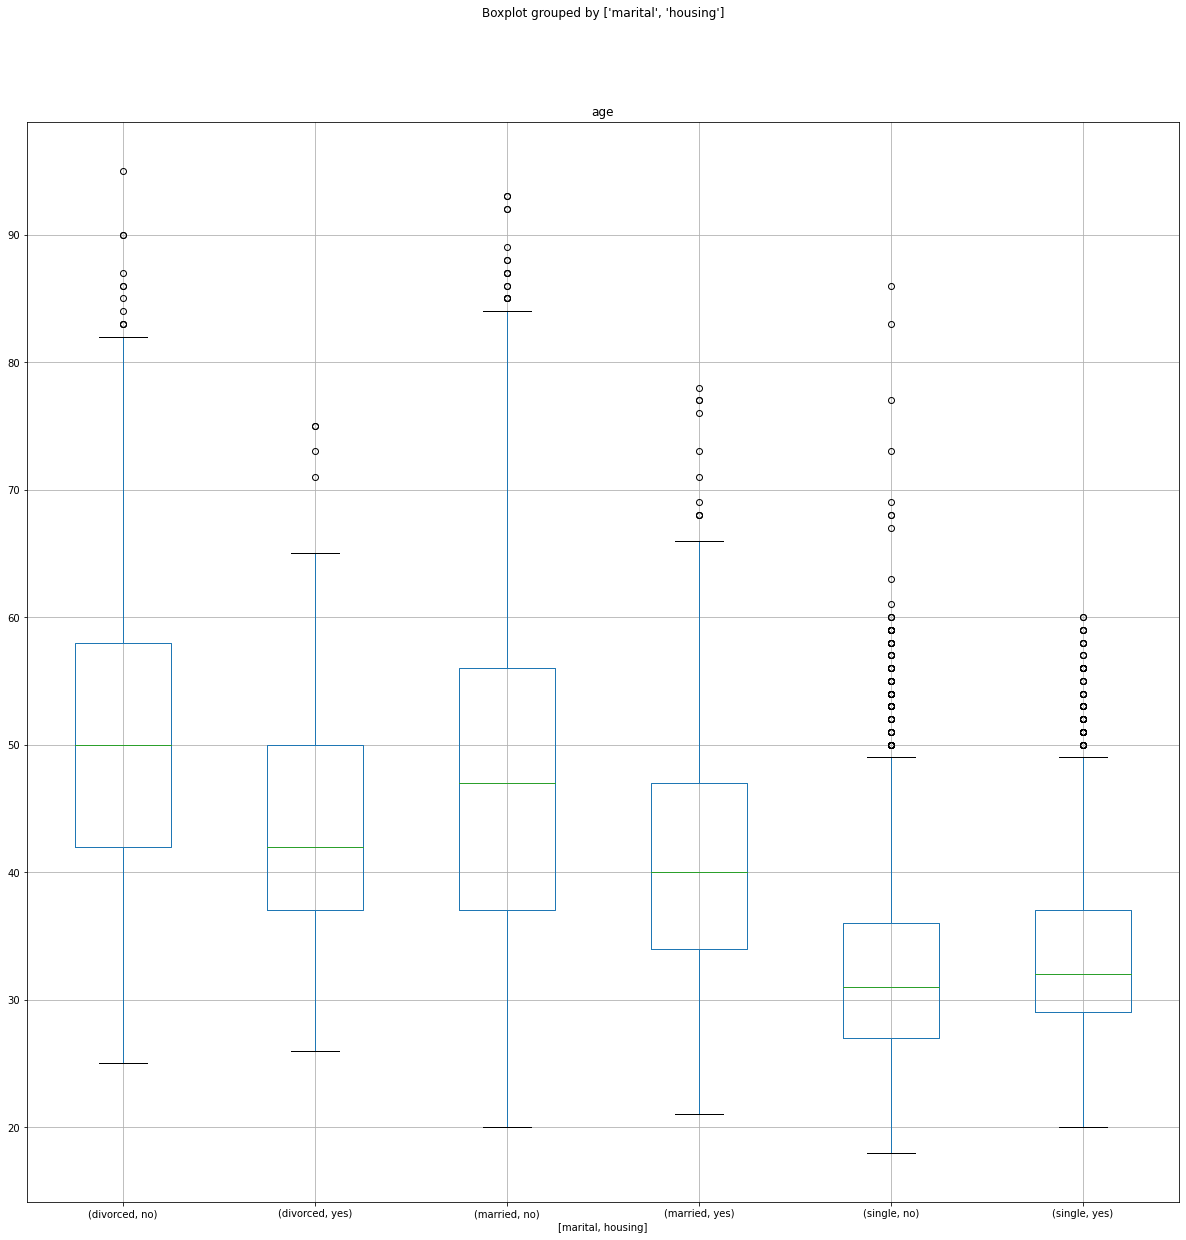

In [47]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))
plt.show()

## 5. Data Cleaning and data Pre Processing

Trước khi áp dụng được mô hình Machine Learning, chúng ta cần có một số bước chuẩn bị và xử lý dữ liệu :
1. Chuyển đổi các cột có giá trị 'yes' và 'no' thành cột boolean
2. Convert các cột phân loại thành các dummy variable

In [51]:
def get_dummy_from_bool(row, column_name):
    ''' Trả về 0 nếu giá trị trong column_name là no, trả về 1 nếu giá trị trong column_name là yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Trả về giá trị trung bình nếu giá trị trong column_name vượt quá ngưỡng'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - dataset ban đầu
    
    OUTPUT
    df - dataset đã được làm sạch và xử lý:
    1. các cột có giá trị "yes" và "no" được chuyển đổi thành các biến boolean;
    2. các cột phân loại chuyển thành các dummy variable;
    3. Loại bỏ những cột không liên quan.
    4. Đưa ra các giá trị không chính xác
    '''
    cleaned_df = df.copy()
    
#chuyển đổi các cột chứa các giá trị 'có' và 'không' thành các biến boolean và bỏ các cột ban đầu
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
#convert categorical columns thành biến giả
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
#Loại bỏ những cột không liên quan
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
#đưa ra các giá trị không chính xác và loại bỏ các cột ban đầu
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [52]:
# Dataset đã clean
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


## 6. Build Model Machine Learning

#### Mô hình phân loại cho dự đoán kết quả (Classification)

In [53]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [84]:
X


,age,balance,day,duration,default_bool,housing_bool,loan_bool,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1.0,0.0
11158,39,733,16,83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.0,0.0
11159,32,29,19,156,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.0,0.0
11160,43,0,8,9,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,2.0,5.0


In [54]:
TEST_SIZE = 0.2
RAND_STATE = 42

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [77]:
print("Original:", df.shape,
      "\nX Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)

Original: (11162, 17) 
X Train: (8929, 41) 
X Test: (2233, 41) 
 
y Train: (8929, 1) 
y Test: (2233, 1)


In [87]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(X_train)
x_test_std_features=std_model.transform(X_test)

In [88]:
x_train_std_features.shape


(8929, 41)

In [89]:
x_test_std_features.shape

(2233, 41)

#### Model Building: Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train_std_features, y_train)

In [91]:
y_predicted_randomforest = randomforest_model.predict(x_test_std_features)
randomforest_model.score(x_test_std_features,y_test)

0.8190774742498881

In [93]:

print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8190774742498881
Precision: 0.8272458045409674
Recall: 0.7853795688847235


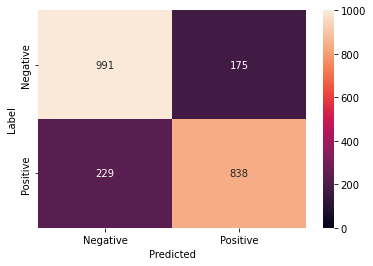

In [115]:
#from sklearn.metrics import confusion_matrix, classification_report
# Making the Confusion Matrix
#cm = confusion_matrix(y_test,y_predicted_randomforest)
#sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
#plt.ylabel("Label")
#plt.xlabel("Predicted")
#plt.show()


Khách hàng ở độ tuổi lớn hơn có nhiều khả năng đăng ký gửi tiết kiệm.

Khách hàng có số dư tài khoản lớn hơn có nhiều khả năng đăng ký gửi tiết kiệm.

Số lần liên hệ với khách hàng thực sự quan trọng. Nếu quá nhiều lần liên hệ sẽ khiến KH từ chối lời mời gửi tiết kiệm.